# Selenium模块爬取微信公众号“数据管道”

## *PRD1*数据加值宣言

<b>本项目产出自以Python+Selenium模块对微信公众号“数据管道”的所有发布文章（*共61页，532篇文章*）的时间，标题，以及文章url进行爬取挖掘的数据并根据文章标题拆分进行词频分析输出可视化词云。以解决对该微信公众号进行相关内容分析的需求。</b>

* 关键词：数据管道
* 页数：所有（1-61）
* 类别数据：文章标题、发布时间、URL


## *PRD2*数据加值

产品核心价值：通过分析“数据管道”一公众号的发布内容，获取数据分析/数据处理相关学界/业界的新资讯，以词频分析来筛选关键词进行分析。


<b>依本产品总结：</b>
1. 数据相关行业（业界及学界）更多使用Python进行数据处理（Python出现次数最多）
2. 数据库更多使用SQL
3. 在数据分析中，常用Pandas以及NumPy
4. 数据可视化时使用pyecharts较多
5. “干货”“技巧”“最新”“代码”出现次数多，说明该公众号分享文章使用且新颖。
6. 机器学习、数据分析也是热门的项目


## 挖掘公众号的基本信息

名称：数据管道

类别：互联网相关

文章数目：532

内容类型：Python、数据分析、机器学习、数据科学


# 准备工作

In [8]:
'''
阿里研究院
阿里健康
阿里巴巴商学院
阿里数据

腾讯金融科技
腾讯研究院
腾讯媒体研究院
腾讯云启研究院
酷鹅用户研究院
'''
公众号 = "数据管道"

In [149]:
fn = { "output" : { "公众号_htm_snippets": "/Users/autumnhui/Desktop/公众号/data_raw_src/公众号_htm_snippets_{公众号}.tsv",
                    "公众号_df": "/Users/autumnhui/Desktop/公众号/data_raw_src/公众号_df_{公众号}.tsv",
                    "公众号_xlsx": "/Users/autumnhui/Desktop/公众号/data_sets/公众号_url_{公众号}.xlsx" } \
      }

# 采集公众号（requests）

In [7]:
# 目标url

import time
import requests
import pandas as pd
import csv


url = "https://mp.weixin.qq.com/cgi-bin/appmsg"

# 使用Cookie，跳过登陆操作
headers = {
  "Cookie": "pgv_pvi=7968112640; RK=dAxoOkmNPM; ptcz=5e911a8738788675abb010f85db7a6c13b0570811db08ebefce3d01adfff5127; tvfe_boss_uuid=35a8107e1f02cbf7; pgv_pvid=160875890; o_cookie=576726974; pgv_si=s7389809664; uin=o0576726974; skey=@biD9HkZPV; ptisp=ctc; ua_id=o954FR4YG9aIylgbAAAAAAG1mFSkee-v8r6HcCv6PUM=; cert=xdo33QVRQxDDEATQOxVPYZVSl8hcgbBw; noticeLoginFlag=1; xid=; openid2ticket_omd36wPk8CgeWUiAccw6ZoK6cfKM=V9b+6gaDppAhuzkBsqQ2cqmVOoVbPExAl/fu+rqQ2xk=; mm_lang=zh_CN; rewardsn=; wxtokenkey=777; uuid=3f563116b647ce9a578c8d004d3508a8; ticket=a4fe0acfed322dd3eff3a301d94afded6dac3be0; ticket_id=gh_b8ce1853cd9b; rand_info=CAESIIpFhkwqorHCev9Vkx8d1xoS/h28VHdI65d1I+hS8rYh; slave_bizuin=3252904960; data_bizuin=3509374721; bizuin=3252904960; data_ticket=6z/ln+jO+jKPoA5MKzm3D6Cbfkg41cD9D6v6HTaHq8//2C9Hk73W6LtQlNMXteTT; slave_sid=eWpTNFJYU0hHQUFtcUt1TnBGSEZDYU55bHJXX2hhTTlZa3hvcno4MFRNaGd2QUlIT2Vxb0xHUmRWc1RQV2txQkI3OXFlUXhuOWY1aGVYbWdvTGFpNzNhTTdNaGhaRWNWNmwzTmFMRWlEa25Pa0VkZGpwVGkxNTRUdmRTbEtpbGF2UFUwbEZJR0lHdnlBcDFs; slave_user=gh_b8ce1853cd9b; openid2ticket_oAc8s0T6rPCr8qnMO7SoANf_3jVI=LJrk/Pum+BnDCZRPacwc+RgFKJv/+2uJEUtvOa1gdTU=",
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36"}

data = {
    "token": "1119521086",
    "lang": "zh_CN",
    "f": "json",
    "ajax": "1",
    "action": "list_ex",
    "begin": "0",
    "count": "5",
    "query": "",
    "fakeid": "MzI0Nzc3MTQyMw==",
    "type": "9",
}



content_list=[]

for i in range(5):
    data["begin"] = i*5
    print(data["begin"])
    time.sleep(3)
    # 使用get方法进行提交
    content_json = requests.get(url, headers=headers, params=data).json()
#     print(content_json)
    # 返回了一个json，里面是每一页的数据
    for item in content_json["app_msg_list"]:
    # 提取每页文章的标题及对应的url
        items = []
        items.append(item["title"])
        items.append(item["link"])
        items.append(item["create_time"])
        content_list.append(items)


name=['title','link','create_time']
test=pd.DataFrame(columns=name,data=content_list)
with pd.ExcelWriter(fn["output"]["公众号_xlsx"].format(公众号="蚂蚁金服科技_requests")) as writer:
    test.to_excel(writer)

# test.to_csv("../微信公众号爬虫_zhichao/南方周末.csv",mode='a',encoding='utf-8')
# print("保存成功")

0
5
10
15
20


NameError: name 'ExcelWriter' is not defined

# 采集公众号（selenium）

In [2]:
import pandas as pd
import numpy as np
from lxml.html import fromstring
import time
from random import random

# when selenium main_content is used
# Parses an HTML document from a string constant.  Returns the root nood
# root = fromstring(df.loc[1,"html_snippets"]) 

## 使用Selenium
* 要更改 opts.binary_location 至自己本地的Chrome浏览器，建议portable
* Chrome浏览器 和 chromedriver.exe要同版本号到小数后一位
* 要确保可以 开启浏览器机器人
* 要确保浏览器机器人 可以打开网页 driver.get("https://mp.weixin.qq.com")

In [3]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

#caps=dict()
#caps["pageLoadStrategy"] = "none"   # Do not wait for full page load

opts = webdriver.ChromeOptions()
opts.add_argument('--no-sandbox')#解决DevToolsActivePort文件不存在的报错
opts.add_argument('window-size=1920x3000') #指定浏览器分辨率
opts.add_argument('--disable-gpu') #谷歌文档提到需要加上一这个属性来规避bug
opts.add_argument('--hide-scrollbars') #隐藏滚动条, 应对些特殊页面
#opts.add_argument('blink-settings=imagesEnabled=false') #不加载图片, 提升速度
#opts.add_argument('--headless') #浏览器不提供可视化页面. linux下如果系统不支持可视化不加这条会启动失败

opts.binary_location = r"/Applications/Google Chrome.app/Contents/MacOS/Google Chrome" #"H:\_coding_\Gitee\InternetNewMedia\CapstonePrj2016\chromedriver.exe"  

# "H:\_coding_\Gitee\InternetNewMedia\CapstonePrj2016\chromedriver.exe"  
driver = webdriver.Chrome( chrome_options = opts) #desired_capabilities=caps,

/Users/autumnhui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: use options instead of chrome_options


In [4]:
driver.get("https://mp.weixin.qq.com")

## 填表登入

selenium 的定位方法
* find_element_by_id &ensp;&ensp;&ensp;  根据标签id定位
* find_element_by_name   &ensp;&ensp;&ensp; 根据标签的name定位
* find_element_by_xpath  &ensp;&ensp;&ensp; 根据xpath定位
* find_element_by_link_text  &ensp;&ensp;&ensp; 通过文字链接来定位元素
* find_element_by_partial_link_text  &ensp;&ensp;&ensp;  通过文字链接来定位元素
* find_element_by_tag_name  &ensp;&ensp;&ensp;  根据标签的名字定位
* find_element_by_class_name  &ensp;&ensp;&ensp; 通过class name 定位
* find_element_by_css_selector  &ensp;&ensp;&ensp;  根据元素属性来定位

In [5]:
payload =  {"account": "2421130300@qq.com", "password": "Qth321.."}
# payload =  {"account": "NFUHacks@163.com", "password": "NFU706947580"}
driver.find_element_by_xpath('//div[@class="login__type__container login__type__container__scan"]/a').click()

WebDriver 常用方法：
* clear()清楚文本
* send_keys(values)模拟按键输入
* click()模拟点击
* submit模拟提交

In [16]:
driver.find_element_by_xpath('//form[@class="login_form"]//input[@name="account"]').clear()
driver.find_element_by_xpath('//form[@class="login_form"]//input[@name="account"]').send_keys(payload['account'])
driver.find_element_by_xpath('//form[@class="login_form"]//input[@name="password"]').clear()
driver.find_element_by_xpath('//form[@class="login_form"]//input[@name="password"]').send_keys(payload['password'])

In [17]:
driver.find_element_by_xpath('//div[@class="login_btn_panel"]/a').click()

## 点选单

其他常用方法
* size：返回元素的尺寸
* text：获取元素的文本
* get_attribute：获取属性值  &ensp;&ensp;&ensp; get_attribute('innerHTML')获取元素内的全部HTML
* is_displayed()：设置该元素用户是否可见

In [18]:
element = driver.find_element_by_xpath('//a[@id="m_open"]')
element.click()
main_content = element.get_attribute('innerHTML')
main_content

'展开'

In [19]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")

In [20]:
element = driver.find_element_by_xpath('//li[@title[contains(.,"素材管理")]]/a') 
# main_content = element.get_attribute('innerHTML')
# main_content
url2= element.get_attribute("href")
url2

'https://mp.weixin.qq.com/cgi-bin/appmsg?begin=0&count=10&t=media/appmsg_list&type=10&action=list&token=1470812587&lang=zh_CN'

In [21]:
driver.get(url2)

## 新建图文消息

In [22]:
element = driver.find_element_by_xpath('//*[text()[contains(.,"新建图文消息")]]') 
main_content = element.get_attribute('innerHTML')
main_content
element.click()

In [23]:
print (driver.window_handles)

['CDwindow-A762A721A0C185A3EADCCDB8BF89032F', 'CDwindow-5A68B128F4CE6AF328CB3935594D797E']


In [24]:
# 新建图文消息开了另一分视窗，所以要切换 switch_to 
driver.switch_to.window(driver.window_handles[-1])

## 超链接

In [25]:
element = driver.find_element_by_xpath('//*[text()[contains(.,"超链接")]]') 
main_content = element.get_attribute('innerHTML')
print(main_content)
element.click()

                超链接              


In [26]:
# 点 选择其他公众号
element = driver.find_element_by_xpath('//*[text()[contains(.,"选择其他公众号")]]') 
main_content = element.get_attribute('innerHTML')
print(main_content)
element.click()

选择其他公众号


In [27]:
driver.find_element_by_xpath('//form//div[@class="inner_link_account_area"]//input[@class="weui-desktop-form__input"]').clear()
driver.find_element_by_xpath('//form//div[@class="inner_link_account_area"]//input[@class="weui-desktop-form__input"]').send_keys(公众号)

In [28]:
# 点放大镜搜
element = driver.find_element_by_xpath('//button[@class="weui-desktop-icon-btn weui-desktop-search__btn"]')
main_content = element.get_attribute('innerHTML')
print(main_content)
element.click()

<div class="weui-desktop-icon weui-desktop-icon__inputSearch weui-desktop-icon__small"><!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <!----> <svg width="16" height="16" viewBox="0 0 16 16" xmlns="http://www.w3.org/2000/svg"><path d="M11.33 10.007l4.273 4.273a.502.502 0 0 1 .005.709l-.585.584a.499.499 0 0 1-.709-.004L10.046 11.3a6.278 6.278 0 1 1 1.284-1.294zm.012-3.729a5.063 5.063 0 1 0-10.127 0 5.063 5.063 0 0 0 10.127 0z"></path></svg> <!----> <!----> <!----> <!----></div>


In [29]:
element = driver.find_element_by_xpath('//ul[@class="inner_link_account_list"]')
main_content = element.get_attribute('innerHTML')
print(main_content)
公众号SERP = main_content


<li class="inner_link_account_item"><div class="weui-desktop-vm_primary"><img src="http://mmbiz.qpic.cn/mmbiz_png/YnV1icfkcN8aZVf6NSolWponXhrrT3Iyia0l6gWW6ibdLSeIQHaXKzpOGIYZDPNmv87iauDFjbvvYSO1pbVkxRTmrQ/0?wx_fmt=png" class="inner_link_account_avatar"> <strong class="inner_link_account_nickname">数据管道</strong> <i class="inner_link_account_wechat">微信号：adc9556</i></div> <div class="weui-desktop-vm_default inner_link_account_type">订阅号</div></li><li class="inner_link_account_item"><div class="weui-desktop-vm_primary"><img src="http://mmbiz.qpic.cn/mmbiz_png/LD2kI0KlJlkr2NiauIySIocvqJ0XTkNc8AprUhqZSicWygBDI5pNibL7GbH038TOkXWic7AQZicNNiaveGvjwy3oGqvQ/0?wx_fmt=png" class="inner_link_account_avatar"> <strong class="inner_link_account_nickname">管道数据</strong> <i class="inner_link_account_wechat">微信号：未设置</i></div> <div class="weui-desktop-vm_default inner_link_account_type">订阅号</div></li><li class="inner_link_account_item"><div class="weui-desktop-vm_primary"><img src="http://mmbiz.qpic.cn/mmbiz_

In [30]:
# 解析
root = fromstring(公众号SERP) 

In [31]:
主 = root.xpath('//li[@class="inner_link_account_item"]')

account_list = []
for e in 主:
    account_nickname = e.xpath('./div/strong[@class="inner_link_account_nickname"]')[0].text
    account_wechat = e.xpath('./div/i[@class="inner_link_account_wechat"]')[0].text
    account_img = e.xpath('./div/img/@src')[0]
    account = {"nickname": account_nickname, "wechat": account_wechat, "img": account_img,}
    account_list.append(account)

df_account = pd.DataFrame(account_list)

In [32]:
df_account

,nickname,wechat,img
0,数据管道,微信号：adc9556,http://mmbiz.qpic.cn/mmbiz_png/YnV1icfkcN8aZVf...
1,管道数据,微信号：未设置,http://mmbiz.qpic.cn/mmbiz_png/LD2kI0KlJlkr2Ni...
2,管件大数据,微信号：GJDSJ1,http://mmbiz.qpic.cn/mmbiz_png/IkcXibtY2OiaPdr...
3,PIMC油气管道完整性,微信号：wanzhengxing77,http://mmbiz.qpic.cn/mmbiz_png/DicLq4XZYZvRR9g...
4,热力管道知识分享,微信号：未设置,http://mmbiz.qpic.cn/mmbiz_png/cibdudVK8YyuRfm...


In [33]:
element = driver.find_element_by_xpath('//ul[@class="inner_link_account_list"]/li')
main_content = element.get_attribute('innerHTML')
print(main_content)
element.click()

<div class="weui-desktop-vm_primary"><img src="http://mmbiz.qpic.cn/mmbiz_png/YnV1icfkcN8aZVf6NSolWponXhrrT3Iyia0l6gWW6ibdLSeIQHaXKzpOGIYZDPNmv87iauDFjbvvYSO1pbVkxRTmrQ/0?wx_fmt=png" class="inner_link_account_avatar"> <strong class="inner_link_account_nickname">数据管道</strong> <i class="inner_link_account_wechat">微信号：adc9556</i></div> <div class="weui-desktop-vm_default inner_link_account_type">订阅号</div>


In [34]:
# 跳转testing
'''
跳转_input = driver.find_element_by_xpath('//span[@class="weui-desktop-pagination__form"]/input')
跳转_a = driver.find_element_by_xpath('//span[@class="weui-desktop-pagination__form"]/a')
跳转_input.clear()
跳转_input.send_keys(2)
跳转_a.click()
'''

'\n跳转_input = driver.find_element_by_xpath(\'//span[@class="weui-desktop-pagination__form"]/input\')\n跳转_a = driver.find_element_by_xpath(\'//span[@class="weui-desktop-pagination__form"]/a\')\n跳转_input.clear()\n跳转_input.send_keys(2)\n跳转_a.click()\n'

In [35]:
# 跳转上限
l_e = driver.find_elements_by_xpath('//label[@class="weui-desktop-pagination__num"]')
l_e_int  = [int(x.text) for x in l_e] 
print (l_e_int)
print (l_e_int[0]==l_e_int[-1])

[1, 61]
False


In [36]:
pages = list(range(l_e_int[0],l_e_int[-1]+1 ))
#print(pages[0:2])
pages = list(range(1,l_e_int[-1]+1 ))
print(pages)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


## 循环/遍历

In [150]:
# global varialbes 
html_raw = dict()
main_content =""
element = None

In [151]:
def process_pages (pages):
    for p in pages:
        print (p,end='\t')

        跳转_input = driver.find_element_by_xpath('//span[@class="weui-desktop-pagination__form"]/input')
        跳转_a = driver.find_element_by_xpath('//span[@class="weui-desktop-pagination__form"]/a')
        跳转_input.clear()
        跳转_input.send_keys(p)
        跳转_a.click()

        time.sleep(3+2*random())

        element = driver.find_element_by_xpath('//div[@class="inner_link_article_list"]')
        main_content = element.get_attribute('innerHTML')
        #print(main_content)
        html_raw[p] = main_content

In [152]:
process_pages(pages)

1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame([html_raw]).T
df.columns = ["html_snippets"]
df

In [41]:
%store html_raw
import pickle 
filehandler = open("html_raw", 'wb') 
pickle.dump(html_raw, filehandler)

Stored 'html_raw' (dict)


In [42]:
df_out = df[~df.duplicated()]
print (len(df_out))
df[df.duplicated()]

60


,html_snippets
12,"<div><label class=""inner_link_article_item""><s..."


In [43]:
try_again = list(df[df.duplicated()].index)
print(try_again)
try_again = try_again + list (set(pages).difference(set(df.index.values)))
try_again

[12]


[12]

## 暂存档

In [263]:
filename = fn ["output"] ["公众号_htm_snippets"] 
df_out.to_csv(filename.format(公众号=公众号), sep="\t", encoding="utf8")

In [154]:
def parse_html_snippets(_snippet_):
    root = fromstring(_snippet_) 
    title = [x.text for x in root.xpath('//div[@class="inner_link_article_title"]')]
    create_time = [x.text for x in root.xpath('//div[@class="inner_link_article_date"]')]
    link = [x for x in root.xpath('//a/@href')]
    _df_ = pd.DataFrame({"title":title, "create_time": create_time, "link":link})
    return(_df_)
    
l_df = []
for p in pages:
    _df_ = parse_html_snippets(df.loc[p,"html_snippets"])
    print (len(_df_), end=",")
    l_df.append(_df_)

18,15,15,12,16,18,20,19,20,17,16,15,19,16,14,11,11,6,7,8,8,6,7,6,7,6,8,6,6,5,7,6,7,8,7,6,10,7,9,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,1,

In [155]:
df_url_out = pd.concat(l_df).reset_index(drop=True)
df_url_out.loc[0:10]

,title,create_time,link
0,关于数据分析师的几点思考,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
1,5个常用的大数据可视化分析工具,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
2,微软官方再次上线了Python教程，这次比较高级,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
3,搜索引擎背后的经典数据结构和算法,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
4,首发，全网独一份的数据分析资源，过会就删！！,2020-05-12,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
5,SQL 查询优化之 WHERE 和 LIMIT 使用索引的奥秘,2020-05-12,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
6,「数据分析 」 B站市值破百亿，你真的不考虑当个up主吗？,2020-05-12,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
7,「经验总结」在滴滴和头条干了 2 年,2020-05-12,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
8,推荐一位大数据分析工程师朋友,2020-05-11,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
9,最全Python自动化办公总结,2020-05-11,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...


In [156]:
df_url_out.tail(5)

,title,create_time,link
527,Python表情包解释为什么吃多了会拉shi！,2019-01-30,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
528,都说了解PCA，那你知道ICA吗？,2019-01-27,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
529,线性回归只能用sklearn实现吗？,2019-01-25,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
530,你会用Python做数据预处理吗？,2019-01-24,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
531,你愿意花十分钟系统了解数据分析方法吗？,2019-01-23,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...


In [157]:
# tagging 标记
tagging_list = ["","马化腾", "腾讯", "微众银行","腾讯复星","腾讯风控","腾讯支付","WeChat","We Remit",\
                "公益日","红包",\
                "腾讯财付通","鹅厂","QQ钱包","QQ红包","QQ",\
                "只有一","大咖","听说","图片","照片","小编",\
                "洗钱", "黑产","被骗","腾讯安全课","诈骗", "炒股","神秘兼职","神秘组织",\
                "财付通", "品牌",\
                "收款",\
                "报告",\
                "银行卡","理财","选股","发票","基金",\
                "区块链","金融云","O2O","农产品","家乡",\
                "数据", "数据赋能", "智能", "数字孪生", "智慧大脑",\
                "出行","乘车","公交","乘车码", "智慧地铁",\
                "高峰论坛", "智库",\
                "央行","新规", \
                "微信", "微信支付", "跨境支付", "移动支付","非银行支付","电子支付",\
                "互联网金融", "金融科技","互联网＋","互联网+金融","普惠金融","虚拟银行",\
                "开放","生态","复杂","互联网思维","全球合作伙伴",\
                "联合国", "城市", "粤港澳大湾区", "平台", "可持续发展", "未来", "绿色",\
                "医护","防护服","小时","武汉","危机","新冠肺炎", "疫", "疫情", "复工","停课","宅经济",\
                "基建","新基建"] #overwritable

v_v_list = []

for tag in tagging_list:
    index_list = df_url_out [ df_url_out.title.str.contains(tag) ].index.tolist()
    v_v_pairs = pd.DataFrame({tag:index_list}).melt().set_index("value")
    v_v_list.append(v_v_pairs)

df_cat = v_v_list[0]
for d in v_v_list:
    df_cat.update(d)
    
# 输出未分类内容
df_url_out.loc [ df_cat.query('variable==""').index ]

,title,create_time,link
value,,,
2,微软官方再次上线了Python教程，这次比较高级,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
5,SQL 查询优化之 WHERE 和 LIMIT 使用索引的奥秘,2020-05-12,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
7,「经验总结」在滴滴和头条干了 2 年,2020-05-12,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
9,最全Python自动化办公总结,2020-05-11,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
10,Python3 网络爬虫之视频下载，那些事儿！,2020-05-11,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
...,...,...,...
525,Python模拟社会财富分配。,2019-02-01,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
526,面试必备之Python深、浅拷贝。,2019-01-31,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
527,Python表情包解释为什么吃多了会拉shi！,2019-01-30,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...


In [158]:
df_url_out[df_url_out.duplicated()]

,title,create_time,link
186,数据分析师 or 算法工程师,2020-03-18,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
187,中国博士开发可交互全球疫情地图，GitHub 已有 4500 star！,2020-03-18,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
188,这5点让你拥有数据分析思维,2020-03-18,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
189,研究生导师讨厌什么样的学生 ？,2020-03-18,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
190,HSQL常问的这几点,2020-03-17,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
191,百度工程师非法控制公司服务器“挖矿”：4个月获利10万，被判坐牢3年,2020-03-17,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
192,实至名归！NumPy 官方早有中文教程，还有防脱发指南,2020-03-17,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
193,一个案例教会你：如何对产品做数据分析？,2020-03-17,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
194,数据分析师必知的那些Hive-SQL,2020-03-16,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
195,实战 | Kaggle竞赛：预测二手车每年平均价值损失,2020-03-16,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...


In [159]:
df_url_out[~df_url_out.duplicated()]

,title,create_time,link
0,关于数据分析师的几点思考,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
1,5个常用的大数据可视化分析工具,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
2,微软官方再次上线了Python教程，这次比较高级,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
3,搜索引擎背后的经典数据结构和算法,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
4,首发，全网独一份的数据分析资源，过会就删！！,2020-05-12,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
...,...,...,...
527,Python表情包解释为什么吃多了会拉shi！,2019-01-30,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
528,都说了解PCA，那你知道ICA吗？,2019-01-27,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
529,线性回归只能用sklearn实现吗？,2019-01-25,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...
530,你会用Python做数据预处理吗？,2019-01-24,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...


In [160]:
df_o = df_url_out.join(df_cat).replace("", np.nan).fillna("无法分类")
df_o

,title,create_time,link,variable
0,关于数据分析师的几点思考,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,数据
1,5个常用的大数据可视化分析工具,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,数据
2,微软官方再次上线了Python教程，这次比较高级,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,无法分类
3,搜索引擎背后的经典数据结构和算法,2020-05-13,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,数据
4,首发，全网独一份的数据分析资源，过会就删！！,2020-05-12,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,数据
...,...,...,...,...
527,Python表情包解释为什么吃多了会拉shi！,2019-01-30,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,无法分类
528,都说了解PCA，那你知道ICA吗？,2019-01-27,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,无法分类
529,线性回归只能用sklearn实现吗？,2019-01-25,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,无法分类
530,你会用Python做数据预处理吗？,2019-01-24,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,数据


In [161]:
df_o[df_o.title.str.contains("腾讯")]

,title,create_time,link,variable
121,腾讯是如何支撑 6W 员工远程工作的？,2020-04-06,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,腾讯
142,我拿到了腾讯最爱考的数据分析面试题,2020-03-31,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,数据
296,腾讯捐3亿、京东顺丰物流优先派送，互联网公司驰援武汉！,2020-01-26,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,武汉
389,腾讯背后的神秘金主，1000亿美元资本大收割,2019-09-02,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,腾讯
508,腾讯技术大佬教你如何写简历。,2019-02-28,http://mp.weixin.qq.com/s?__biz=MzU5NDgyMjc0OQ...,腾讯


In [162]:
df_stats = df_o.groupby(by="variable").agg({"title":"count"}).sort_values(by="title", ascending=False)
df_stats

,title
variable,
无法分类,333
数据,154
疫情,11
报告,7
微信,6
开放,4
腾讯,3
武汉,3
疫,2


## 输出

In [163]:
df_account.columns.name = "rel_accounts"
df_o.columns.name = "url_cat"
df_stats.columns.name = "stats"

In [164]:
_df_.columns.name

In [168]:
# Get the xlsxwriter workbook and worksheet objects.  
with pd.ExcelWriter(fn["output"]["公众号_xlsx"].format(公众号=公众号)) as writer:
    workbook  = writer.book

    for _df_ in [df_account, df_o, df_stats]:
        _df_.to_excel(writer, sheet_name = _df_.columns.name)

In [ ]:
df_o

In [207]:
# 只要标题
标题字典=df_o['title'].to_dict()

In [253]:
# 筛选标题字典（去掉符号）

标题字典
for k,v in 标题字典.items():
    标题字典[k] = 标题字典[k].replace(' ','')
    标题字典[k] = 标题字典[k].replace('！','')
    标题字典[k] = 标题字典[k].replace('，','')
    标题字典[k] = 标题字典[k].replace('。','')
    标题字典[k] = 标题字典[k].replace('？','')

文本=[]
for k,v in 标题字典.items():
    文本.append(v)
文本

['关于数据分析师的几点思考',
 '5个常用的大数据可视化分析工具',
 '微软官方再次上线了Python教程这次比较高级',
 '搜索引擎背后的经典数据结构和算法',
 '首发全网独一份的数据分析资源过会就删',
 'SQL查询优化之WHERE和LIMIT使用索引的奥秘',
 '「数据分析」B站市值破百亿你真的不考虑当个up主吗',
 '「经验总结」在滴滴和头条干了2年',
 '推荐一位大数据分析工程师朋友',
 '最全Python自动化办公总结',
 'Python3网络爬虫之视频下载那些事儿',
 '聊聊最近',
 'SQL进阶技巧',
 '你这数据接口设计的真”辣鸡“简直没法看',
 '4月份最热门的11个Python开源项目——面试、爬虫、机器学习应有尽有',
 '常见数据分析规范',
 '统计学知识大梳理（终极篇）',
 '网传互联网公司加班表哈哈哈这也太真实了吧',
 '数据分析师or算法工程师',
 '中国博士开发可交互全球疫情地图GitHub已有4500star',
 '这5点让你拥有数据分析思维',
 '研究生导师讨厌什么样的学生',
 'HSQL常问的这几点',
 '百度工程师非法控制公司服务器“挖矿”：4个月获利10万被判坐牢3年',
 '实至名归NumPy官方早有中文教程还有防脱发指南',
 '一个案例教会你：如何对产品做数据分析',
 '数据分析师必知的那些Hive-SQL',
 '实战Kaggle竞赛：预测二手车每年平均价值损失',
 '女性消费特征分析报告',
 '对不起让大家失望了',
 '数据和业务的关系是什么',
 '李宏毅机器学习2020版正式开放上线附B站观看链接',
 '5个热搜看2019全球AI这一年',
 '最新微信零钱免费提现方法（2020版）',
 'Python数据分析师不可错过的优质项目',
 '数据分析的5个坑',
 '5月1日新规别再随便删微信聊天记录',
 'Python和Excel终于可以互通了',
 '披着数据分析师的外衣干着鱼龙混杂的活',
 '用SQL而不是Python处理文本数据',
 '微软官方上线了Python教程7个章节就把Python说通了',
 '数据可视化的10个关键术语',
 '劝你们不要过度迷信数据分析',
 '一句SQL我有6种写法',
 '看下这7家互联网公司的数据科学技术

In [7]:
# 进行分词生成词云可视化操作

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import jieba

In [242]:
# 导出文本。
for i in 文本:
#     print(i)
    with open("/Users/autumnhui/Desktop/公众号/标题数据.txt", "a", encoding='utf-8') as f:
        f.write(i)

In [243]:
# 打开看看
with open("/Users/autumnhui/Desktop/公众号/标题数据.txt", "r", encoding='utf-8') as f:
     text = ' '.join(jieba.cut(f.read(),cut_all=False))
     print(text)

关于 数据 分析师 的 几点 思考 5 个 常用 的 大 数据 可视化 分析 工具 微软 官方 再次 上线 了 Python 教程 ， 这次 比较 高级 搜索引擎 背后 的 经典 数据结构 和 算法 首发 ， 全网 独 一份 的 数据分析 资源 ， 过会 就 删 ！ ！ SQL   查询 优化 之   WHERE   和   LIMIT   使用 索引 的 奥秘 「 数据分析   」   B 站 市值 破 百亿 ， 你 真的 不 考虑 当个 up 主 吗 ？ 「 经验总结 」 在 滴滴 和 头条 干 了   2   年 推荐 一位 大 数据分析 工程师 朋友 最全 Python 自动化 办公 总结 Python3   网络 爬虫 之 视频 下载 ， 那些 事儿 ！ 聊聊 最近 SQL   进阶 技巧 你 这 数据 接口 设计 的 真 ” 辣鸡 “ ， 简直 没法 看 ！ 4 月份 最 热门 的 11 个 Python 开源 项目 — — 面试 、 爬虫 、 机器 学习 应有尽有 ！ 常见 数据分析 规范 统计学 知识 大 梳理 （ 终极 篇 ） 网传 互联网 公司 加班 表 ， 哈哈哈 这 也 太 真实 了 吧 ！ 数据 分析师   or   算法 工程师 中国 博士 开发 可 交互 全球 疫情 地图 ， GitHub   已有   4500   star ！ 这 5 点 让 你 拥有 数据分析 思维 研究生 导师 讨厌 什么样 的 学生   ？ HSQL 常问 的 这 几点 百度 工程师 非法 控制 公司 服务器 “ 挖矿 ” ： 4 个 月 获利 10 万 ， 被判 坐牢 3 年 实至名归 ！ NumPy   官方 早有 中文 教程 ， 还有 防脱发 指南 一个 案例 教会 你 ： 如何 对 产品 做 数据分析 ？ 数据 分析师 必知 的 那些 Hive - SQL 实战   |   Kaggle 竞赛 ： 预测 二手车 每年 平均 价值 损失 女性 消费 特征分析 报告 对不起 ， 让 大家 失望 了 数据 和 业务 的 关系 是 什么 ？ 李宏毅 机器 学习 2020 版 正式 开放 上线   |   附 B 站 观看 链接 5 个 热 搜 ， 看 2019 全球 AI 这 一年 最新 微信 零钱 免费 提现 方法 （ 2020 版 ） Python 数据 

/Users/autumnhui/anaconda3/lib/python3.7/site-packages/wordcloud/wordcloud.py:995: UserWarning: mask image should be unsigned byte between 0 and 255. Got a float array
  warnings.warn("mask image should be unsigned byte between 0"


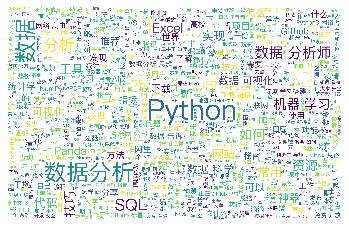

In [19]:
# 获得wordcloud 需要的文本格式

with open("/Users/autumnhui/Desktop/公众号/标题数据.txt", "r", encoding='utf-8') as f:
     text = ' '.join(jieba.cut(f.read(),cut_all=False))
#      print(text)

backgroud_Image = plt.imread('/Users/autumnhui/Desktop/公众号/a.png')  # 背景图，生成图片的大小为背景图的大小

# 词云参数设置
wc = WordCloud(
      background_color='white',
      mask=backgroud_Image,
      font_path='PingFang.ttc',
      max_words=2000,
      max_font_size=200,
      min_font_size=20,
      repeat=False,
      random_state=50
      )

# 生成词云
word_cloud = wc.generate(text)
# word_cloud= wc.generate_from_frequencies(frequencies[, ...])
plt.imshow(word_cloud)
plt.axis('off')

# 输出
wc.to_file('/Users/autumnhui/Desktop/公众号/输出结果.jpg')

In [13]:
# 查看词云参数
?WordCloud